In [ ]:
# default_exp gbe.wm.baseline_drinking

# Working memory task - Reliability

<div>
    <p align="left"><img src="images/wm_task.png" width = '200px'> 

    
   
    
</div>

In [ ]:
%load_ext autoreload
%autoreload 2
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
%reload_ext rpy2.ipython
import seaborn as sns
from matplotlib import pyplot as plt
custom_params = {"axes.spines.right": False, "axes.spines.top": False}
sns.set_theme(style="white", font_scale = 1.3, rc=custom_params)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [ ]:
#export
%load_ext autoreload
%autoreload 2
from trr265.gbe.wm.data_provider import WMDataProvider
import trr265.gbe.wm.scoring as wm_scoring 
import trr265.stats as stats
import pandas as pd

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Loading the data
In this notebook, all tests and examples are run on the initial baseline dataset.

In [ ]:
# Getting raw data
dp = WMDataProvider('/Users/hilmarzech/Projects/trr265/trr265/data/')
df = dp.get_wm_data()
# Adding data from redcap
df = df.merge(dp.get_gbe_data(columns = ['participant','session_number','is_initial','is_baseline']), left_on = 'gbe_index', right_index = True, how = 'left')
# Filtering out replication and ema data
df = df.query("is_initial and is_baseline")
# Filtering participants with old app
df = dp.filter_old_app_sessions(df)
df = dp.filter_level_two_failures(df)

9 participants used an old version of the task in some of their sessions.  14 sessions (2.58%) were removed from the dataset.
6 sessions (1.14%) were removed because participants failed a level two trial.


## Standard drinks per day over last three month

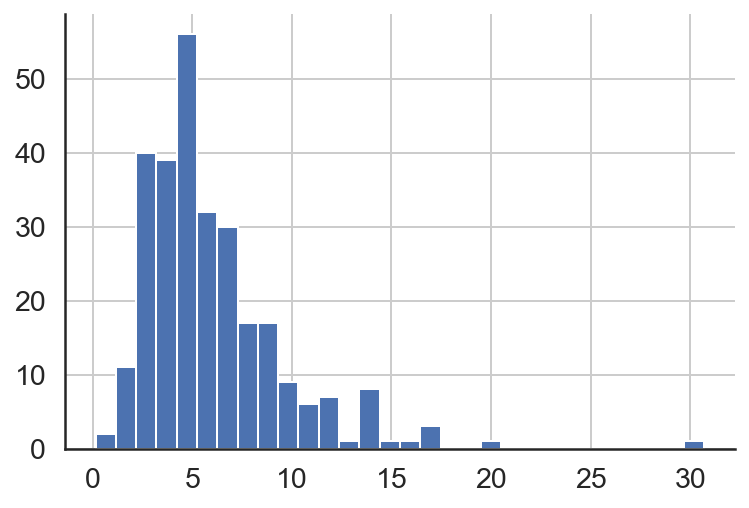

In [ ]:
ba = dp.get_ba_data(columns = ['redcap_event_name','mov_id','bx_qf1_sum']).query("redcap_event_name=='erhebungszeitpunkt_arm_1'")
initial_participants = df.participant.unique()
ba = ba[ba.mov_id.isin(initial_participants)]
alcohol = ba[~ba.bx_qf1_sum.isnull()]
alcohol.bx_qf1_sum.hist(bins = 30)
sns.despine()

## Relationship to WM

### Gold Standard: Maximum WM load

#### No distractor 1

<AxesSubplot:xlabel='max_level_no_distractor_1', ylabel='bx_qf1_sum'>

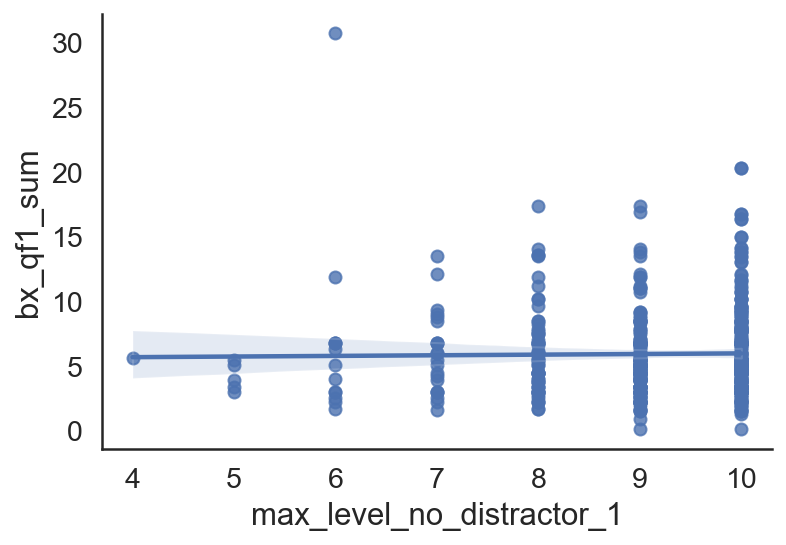

In [ ]:
_df = wm_scoring.get_max_levels(df)#['max_level_no_distractor_1']
_df = _df.merge(dp.get_gbe_data(columns = ['participant','session_number','is_initial','is_baseline']), left_on = 'gbe_index', right_index = True, how = 'left')
#iccs_mean_no_distractor_1 = stats.analyze_reliability(_df, dependent = 'max_level_no_distractor_1', add_jitter = True)
_df = _df.merge(alcohol, left_on = 'participant', right_on = 'mov_id')
_df
sns.regplot(x = 'max_level_no_distractor_1', y = 'bx_qf1_sum', data = _df)

#### No distractor 2

<AxesSubplot:xlabel='max_level_no_distractor_2', ylabel='bx_qf1_sum'>

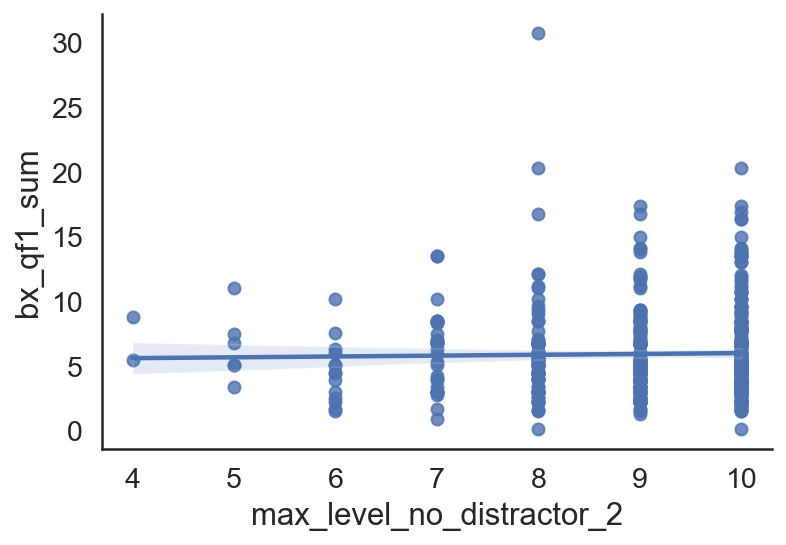

In [ ]:
sns.regplot(x = 'max_level_no_distractor_2', y = 'bx_qf1_sum', data = _df)

#### Encoding distractor

<AxesSubplot:xlabel='max_level_encoding_distractor', ylabel='bx_qf1_sum'>

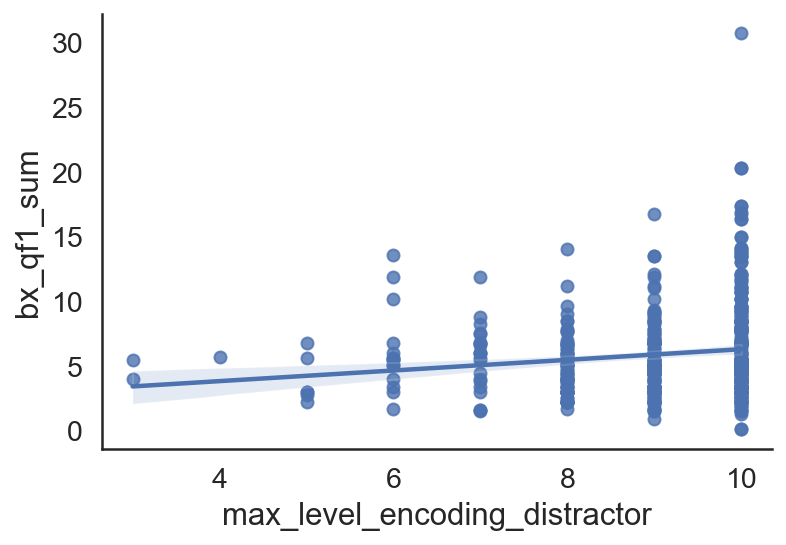

In [ ]:
sns.regplot(x = 'max_level_encoding_distractor', y = 'bx_qf1_sum', data = _df)

#### Delayed distractor

<AxesSubplot:xlabel='max_level_delayed_distractor', ylabel='bx_qf1_sum'>

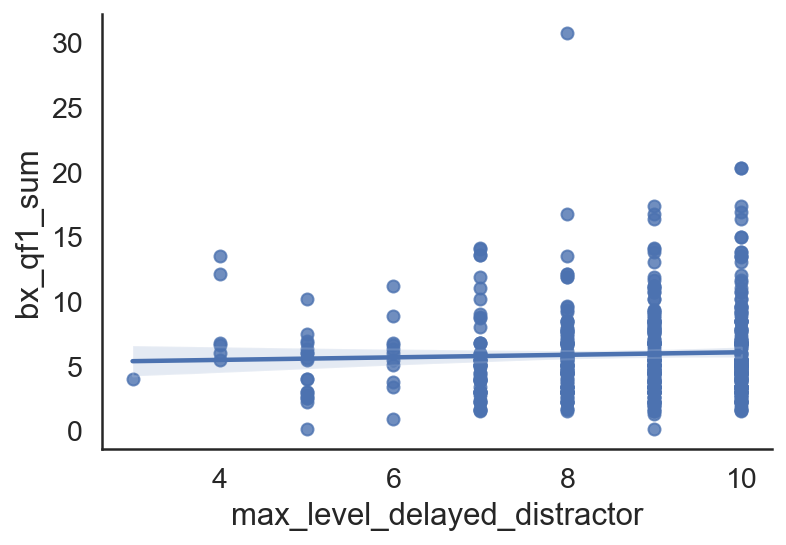

In [ ]:
sns.regplot(x = 'max_level_delayed_distractor', y = 'bx_qf1_sum', data = _df)

In [ ]:
rdf = _df

In [ ]:
%%R -i rdf
require(lmerTest)
m = lmer(bx_qf1_sum ~ max_level_no_distractor_1 + max_level_no_distractor_2 + max_level_encoding_distractor + max_level_delayed_distractor + (1|participant), data = rdf)
summary(m)

Linear mixed model fit by REML. t-tests use Satterthwaite's method [
lmerModLmerTest]
Formula: bx_qf1_sum ~ max_level_no_distractor_1 + max_level_no_distractor_2 +  
    max_level_encoding_distractor + max_level_delayed_distractor +  
    (1 | participant)
   Data: rdf

REML criterion at convergence: -4412.9

Scaled residuals: 
       Min         1Q     Median         3Q        Max 
-2.111e-06 -2.802e-07 -2.240e-09  3.726e-07  2.782e-06 

Random effects:
 Groups      Name        Variance  Std.Dev. 
 participant (Intercept) 7.237e+00 2.690e+00
 Residual                6.309e-13 7.943e-07
Number of obs: 522, groups:  participant, 282

Fixed effects:
                               Estimate Std. Error        df t value Pr(>|t|)
(Intercept)                   5.377e+00  1.499e-01 6.065e+00   35.87  2.7e-08
max_level_no_distractor_1     2.746e-13  6.008e-08 6.065e+00    0.00        1
max_level_no_distractor_2     3.767e-13  6.266e-08 6.065e+00    0.00        1
max_level_encoding_distractor 3.